In [4]:
using Distributions
using PyPlot

In [5]:
function prob(observed_data, model_parameter)
    n1 = observed_data[1]
    n2 = observed_data[2]
    N = n1 + n2
    
    p = model_parameter[1]
    
    return pdf(Binomial(N, p), n1)
#     return binomial(N, n1) * p^n1 * (1-p)^n2
end

prob (generic function with 1 method)

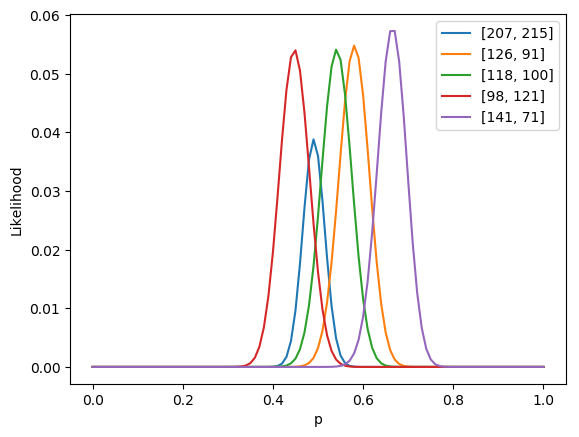

PyObject <matplotlib.legend.Legend object at 0x8f8eb7d0>

In [9]:
x = 0 : 0.01 : 1

observed_data = [207,215] # wuerfeln-1.txt
y= [prob(observed_data, [xi]) for xi in x];
plot(x, y, label = string(observed_data))


observed_data = [126,91] # wuerfeln-2.txt
y= [prob(observed_data, [xi]) for xi in x];
plot(x, y, label = string(observed_data))

observed_data = [118,100] # wuerfeln-3.txt
y= [ prob(observed_data, [xi])  for xi in x];
plot(x, y, label = string(observed_data))

observed_data = [98,121] # wuerfeln-4.txt
y= [prob(observed_data, [xi]) for xi in x];
plot(x, y, label = string(observed_data))

observed_data = [141,71] # wuerfeln-Tam.txt
y= [prob(observed_data, [xi]) for xi in x];
plot(x, y, label = string(observed_data))

ylabel("Likelihood")
xlabel("p")

#yscale("log")
legend()

In [11]:
$$- 
4/5
-$$

ErrorException: syntax: "$" expression outside quote

In [80]:
using Optim

In [81]:
observed_data = [91,110]

2-element Array{Int64,1}:
  91
 110

In [ ]:
optimize(func, [0.1])

In [84]:
res = optimize(p -> -prob(observed_data, p ), [0.5], Newton())

 * Status: success

 * Candidate solution
    Minimizer: [4.53e-01]
    Minimum:   -5.646046e-02

 * Found with
    Algorithm:     Newton's Method
    Initial Point: [5.00e-01]

 * Convergence measures
    |x - x'|               = 4.12e-05 ≰ 0.0e+00
    |x - x'|/|x'|          = 9.10e-05 ≰ 0.0e+00
    |f(x) - f(x')|         = 3.89e-08 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 6.89e-07 ≰ 0.0e+00
    |g(x)|                 = 0.00e+00 ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    3
    f(x) calls:    7
    ∇f(x) calls:   7
    ∇²f(x) calls:  3


In [85]:
Optim.minimizer(res)

1-element Array{Float64,1}:
 0.45273631841262263

In [86]:
observed_data[1] / (observed_data[1] + observed_data[2])

0.4527363184079602

In [87]:
Optim.minimizer(res)[1]  == observed_data[1] / (observed_data[1] + observed_data[2])

false

In [90]:
Optim.minimizer(res)[1] ≈ observed_data[1] / (observed_data[1] + observed_data[2])

true